In [1]:
from parser import Parser, ASTNode, Token
from lexer import lexer
from utils import print_ast, ast_to_networkx
from semantic_analyzer import SemanticAnalyzer

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

In [3]:
tokens = [
    Token('NUMBER', '3'),
    Token('PLUS', '+'),
    Token('NUMBER', '5'),
    Token('MUL', '*'),
    Token('LPAREN', '('),
    Token('NUMBER', '2'),
    Token('MINUS', '-'),
    Token('NUMBER', '8'),
    Token('RPAREN', ')'),
    Token('EOF', '')
]

parser = Parser(tokens)
ast = parser.parse()



print_ast(ast)

PLUS: None
  NUMBER: 3
  MUL: None
    NUMBER: 5
    MINUS: None
      NUMBER: 2
      NUMBER: 8


In [4]:
# Test 1
input_expr = "3 + 5 * (2 - 8)"
tokens = list(lexer(input_expr))
parser = Parser(tokens)
ast = parser.parse()

print_ast(ast)


PLUS: None
  NUMBER: 3
  MUL: None
    NUMBER: 5
    MINUS: None
      NUMBER: 2
      NUMBER: 8


In [6]:
analyzer = SemanticAnalyzer(ast)
analyzer.analyze()

ast_graph, positions = ast_to_networkx(ast)

labels = {node: f"{data['type']}:{data['value']}" for node, data in ast_graph.nodes(data=True)}
plt.figure(figsize=(12, 8))
nx.draw(ast_graph, pos=positions, labels=labels, with_labels=True, node_size=3000, node_color="skyblue", font_size=10, font_weight="bold", edge_color="gray")
plt.show()

Visiting plus node: None
Visiting binary_op node: None
Visiting number node: 3 and node type is NUMBER
Visiting mul node: None
Visiting binary_op node: None
Visiting number node: 5 and node type is NUMBER
Visiting minus node: None
Visiting binary_op node: None
Visiting number node: 2 and node type is NUMBER
Visiting number node: 8 and node type is NUMBER
The type of the first child is number the type of the second child is number.
The type of the first child is number the type of the second child is number.
The type of the first child is number the type of the second child is number.


KeyError: 'data_type'

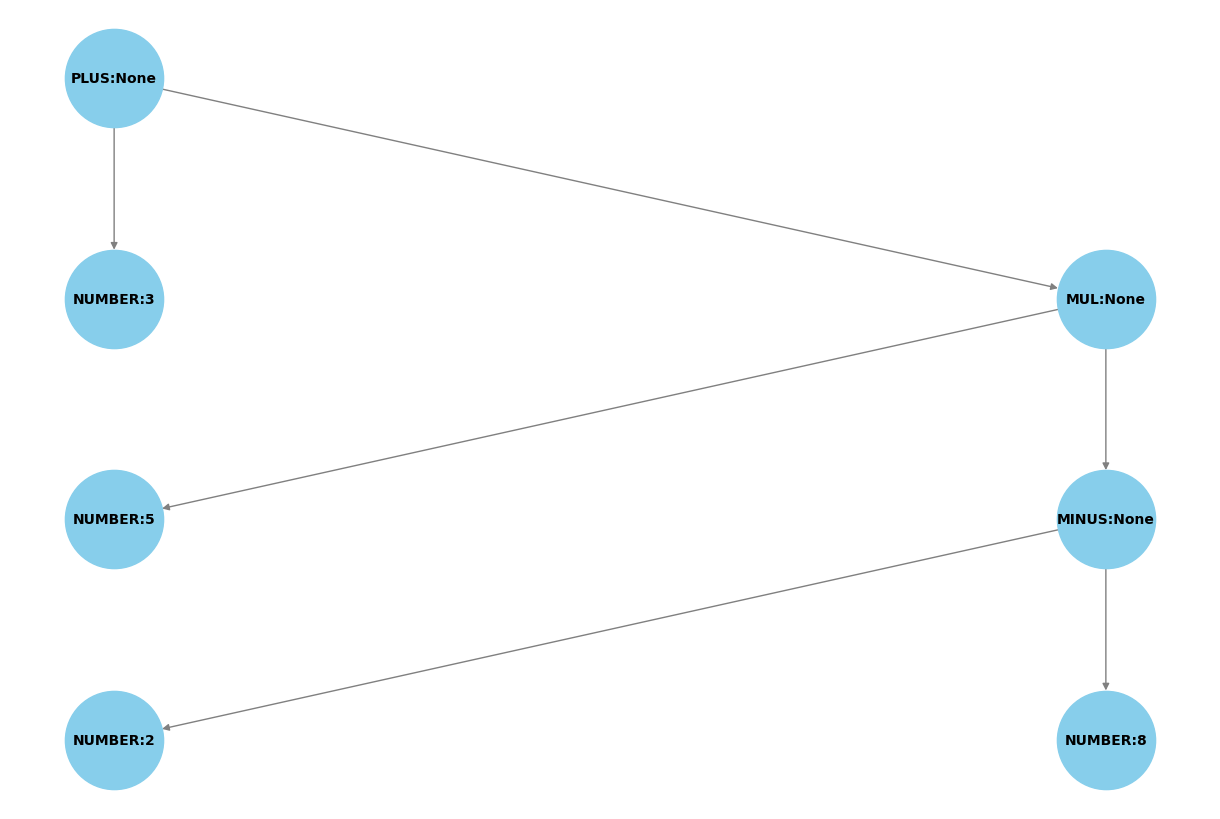

In [ ]:
# Test 1 nx print
input_expr = "3 + 5 * (2 - 8)"
tokens = list(lexer(input_expr))
parser = Parser(tokens)
ast = parser.parse()

ast_graph, positions = ast_to_networkx(ast)

pos = nx.spring_layout(ast_graph)
labels = {node: f"{data['type']}:{data['value']}" for node, data in ast_graph.nodes(data=True)}
plt.figure(figsize=(12, 8))
nx.draw(ast_graph, pos=positions, labels=labels, with_labels=True, node_size=5000, node_color="skyblue", font_size=10, font_weight="bold", edge_color="gray")
plt.show()

In [ ]:
# Test 2
input_expr2 = "(3 + 4) * 5 / 2"
tokens2 = list(lexer(input_expr2))
parser2 = Parser(tokens2)
ast2 = parser2.parse()
print_ast(ast2)

DIV: None
  MUL: None
    PLUS: None
      NUMBER: 3
      NUMBER: 4
    NUMBER: 5
  NUMBER: 2


In [ ]:
# Test 3 / will throw unexpected token exception
input_expr3 = "(3 + +) - 12 - 2"
tokens3 = list(lexer(input_expr3))
parser3 = Parser(tokens3)
ast3 = parser3.parse()
print_ast(ast3)

Exception: Unexpected token PLUS

In [ ]:
# Test 4 / 

input_expr4 = "5 / (3 - 3) - 12 - 2"
tokens4 = list(lexer(input_expr4))
parser4 = Parser(tokens4)
ast4 = parser4.parse()

# Semantic analysis step
analyzer = SemanticAnalyzer(ast4)
analyzer.analyze()

Exception: Type error: None MINUS None

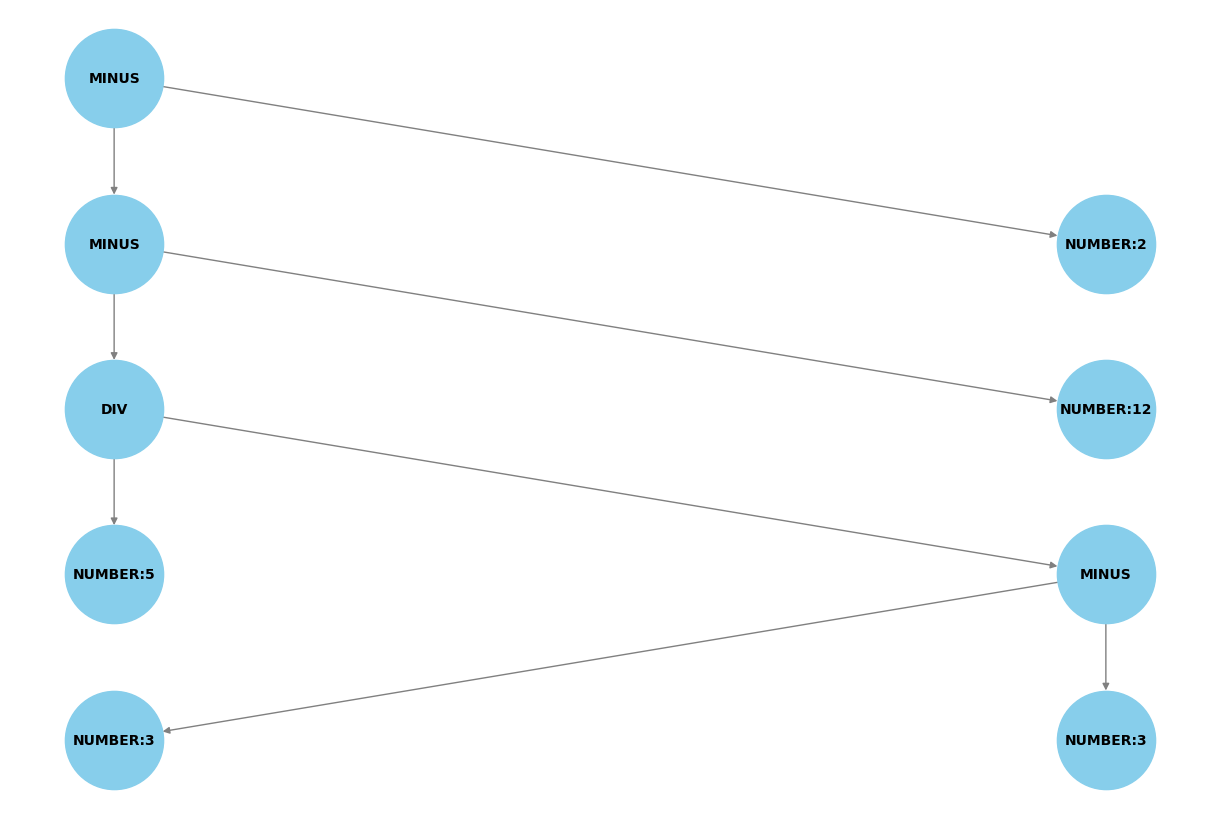

In [ ]:
ast_graph, positions = ast_to_networkx(ast4)

pos = nx.spring_layout(ast_graph)
labels = {node: f"{data['type']}{'' if data['value'] is None else ":" + data['value']}" for node, data in ast_graph.nodes(data=True)}
plt.figure(figsize=(12, 8))
nx.draw(ast_graph, pos=positions, labels=labels, with_labels=True, node_size=5000, node_color="skyblue", font_size=10, font_weight="bold", edge_color="gray")
plt.show()